In [588]:
regions = {
  'MANHATTAN': {
    'm1': ['Battery Park City-Lower Manhattan', 'Chinatown', 'SoHo-TriBeCa-Civic Center-Little Italy', 'Lower East Side'],
    'm2': ['East Village', 'Gramercy', 'Murray Hill-Kips Bay', 'Stuyvesant Town-Cooper Village'],
    'm3': ['Hudson Yards-Chelsea-Flatiron-Union Square', 'West Village'],
    'm4': ['Midtown-Midtown South', 'Clinton', 'Turtle Bay-East Midtown'],
    'm5': ['Yorkville', 'Upper East Side-Carnegie Hill', 'Lenox Hill-Roosevelt Island'],
    'm6': ['Upper West Side', 'Lincoln Square'],
    'm7': ['Central Harlem South', 'Central Harlem North-Polo Grounds', 'East Harlem North', 'East Harlem South', 'Morningside Heights'],
    'm8': ['Washington Heights North', 'Washington Heights South', 'Marble Hill-Inwood', 'Manhattanville', 'Hamilton Heights']
  },
  'BROOKLYN': {
    'b1': ['Bath Beach', 'Bay Ridge', 'Bedford', 'Bensonhurst East', 'Bensonhurst West', 'Borough Park', 'Dyker Heights', 'Kensington-Ocean Parkway', 'Sunset Park East', 'Sunset Park West', 'Windsor Terrace'],
    'b2': ['Greenpoint', 'Williamsburg', 'East Williamsburg', 'North Side-South Side'],
    'b3': ['Bushwick North', 'Bushwick South', 'Crown Heights North', 'Crown Heights South', 'Ocean Hill', 'Stuyvesant Heights'], 
    'b4': ['Brownsville', 'Canarsie', 'Cypress Hills-City Line', 'East New York (Pennsylvania Ave)', 'East New York', 'Rugby-Remsen Village', 'Starrett City'],
    'b5': ['Brooklyn Heights-Cobble Hill', 'Carroll Gardens-Columbia Street-Red Hook', 'Clinton Hill', 'DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill', 'Fort Greene', 'Park Slope-Gowanus', 'Prospect Heights'], 
    'b6': ['Brighton Beach', 'Georgetown-Marine Park-Bergen Beach-Mill Basin', 'Gravesend', 'Homecrest', 'Madison', 'Seagate-Coney Island', 'Sheepshead Bay-Gerritsen Beach-Manhattan Beach', 'West Brighton'],
    'b7': ['East Flatbush-Farragut', 'Erasmus', 'Flatbush', 'Flatlands', 'Midwood', 'Ocean Parkway South', 'Prospect Lefferts Gardens-Wingate']      
  },
  'QUEENS': {
    'q1': ['Astoria', 'Corona', 'East Elmhurst', 'Elmhurst', 'Elmhurst-Maspeth', 'Forest Hills', 'Glendale', 'Hunters Point-Sunnyside-West Maspeth', 'Jackson Heights', 'Maspeth', 'Middle Village',  'North Corona', 'Old Astoria', 'Queensbridge-Ravenswood-Long Island City', 'Rego Park', 'Ridgewood', 'Steinway', 'Woodside'],
    'q2': ['College Point', 'East Flushing', 'Flushing', 'Kew Gardens Hills', 'Murray Hill', 'Pomonok-Flushing Heights-Hillcrest', 'Queensboro Hill', 'Whitestone'],
    'q3': ['Auburndale', 'Bayside-Bayside Hills', 'Bellerose', 'Douglas Manor-Douglaston-Little Neck', 'Fresh Meadows-Utopia', 'Ft. Totten-Bay Terrace-Clearview', 'Glen Oaks-Floral Park-New Hyde Park', 'Oakland Gardens'],
    'q4': ['Baisley Park', 'Cambria Heights', 'Hollis', 'Laurelton', 'Queens Village', 'Richmond Hill', 'Rosedale', 'Springfield Gardens North', 'Springfield Gardens South-Brookville', 'St. Albans'],
    'q5': ['Briarwood-Jamaica Hills', 'Jamaica', 'Jamaica Estates-Holliswood', 'Kew Gardens', 'Lindenwood-Howard Beach', 'Ozone Park', 'South Jamaica', 'South Ozone Park', 'Woodhaven'],
    'q6': ['Breezy Point-Belle Harbor-Rockaway Park-Broad Channel', 'Far Rockaway-Bayswater', 'Hammels-Arverne-Edgemere']
  },
  'BRONX': {
    'bx1': ['Kingsbridge Heights', 'Marble Hill-Inwood', 'North Riverdale-Fieldston-Riverdale', 'Spuyten Duyvil-Kingsbridge', 'Van Cortlandt Village'],
    'bx2': ['Eastchester-Edenwald-Baychester', 'Williamsbridge-Olinville', 'Woodlawn-Wakefield'],
    'bx3': ['Allerton-Pelham Gardens', 'Bronxdale', 'Crotona Park East', 'Hunts Point', 'Parkchester', 'Pelham Parkway', 'Soundview-Bruckner', 'Soundview-Castle Hill-Clason Point-Harding Park', 'Westchester-Unionport', 'West Farms-Bronx River'],
    'bx4': ['Bedford Park-Fordham North', 'Belmont', 'East Tremont', 'Fordham South', 'Mount Hope', 'Norwood', 'University Heights-Morris Heights'],
    'bx5': ['Claremont-Bathgate', 'East Concourse-Concourse Village', 'Highbridge', 'Longwood','Melrose South-Mott Haven North', 'Morrisania-Melrose', 'Mott Haven-Port Morris', 'Van Nest-Morris Park-Westchester Square', 'West Concourse'],
    'bx6': ['Co-op City', 'Pelham Bay-Country Club-City Island', 'Schuylerville-Throgs Neck-Edgewater Park']
  },
  'STATEN IS': {
    's1': ['Grasmere-Arrochar-Ft. Wadsworth', 'Grymes Hill-Clifton-Fox Hills', "Mariner's Harbor-Arlington-Port Ivory-Graniteville", 'New Brighton-Silver Lake', 'Port Richmond', 'Stapleton-Rosebank', 'West New Brighton-New Brighton-St. George', 'Westerleigh'],
    's2': ['Great Kills', 'New Dorp-Midland Beach', 'New Springville-Bloomfield-Travis', 'Oakwood-Oakwood Beach', 'Old Town-Dongan Hills-South Beach', 'Todt Hill-Emerson Hill-Heartland Village-Lighthouse Hill'],
    's3': ["Annadale-Huguenot-Prince's Bay-Eltingville", 'Arden Heights', 'Charleston-Richmond Valley-Tottenville', 'Rossville-Woodrow'] 
  }
}

In [608]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates
from datetime import datetime
%matplotlib inline

lsf_df = pd.read_csv('/Users/agnespark/fds/data/surface_temp.csv')

monthly_usage_df = pd.read_csv('/Users/agnespark/fds/data/monthly_usage.csv')
monthly_usage_df['Month'] = monthly_usage_df['Month'].apply(lambda _: datetime.strptime(_,"%y-%b"))
monthly_usage_df['Gas Usage'] = monthly_usage_df['Gas Usage'].div(1e9)
monthly_usage_df['Electricity Usage'] = monthly_usage_df['Electricity Usage'].div(1e9)

df1 = monthly_usage_df[['Month', 'Borough', 'Gas Usage', 'Electricity Usage']]
df1

,Month,Borough,Gas Usage,Electricity Usage
0,2018-01-01,MANHATTAN,0.000083,0.002192
1,2018-02-01,MANHATTAN,0.000083,0.001882
2,2018-03-01,MANHATTAN,0.000083,0.001960
3,2018-04-01,MANHATTAN,0.000083,0.001842
4,2018-05-01,MANHATTAN,0.000083,0.001893
...,...,...,...,...
272443,2018-08-01,QUEENS,0.000125,0.000166
272444,2018-09-01,QUEENS,0.000125,0.000134
272445,2018-10-01,QUEENS,0.000125,0.000100
272446,2018-11-01,QUEENS,0.000125,0.000095


In [581]:
monthly_usage_df

,PID,PName,Type,Month,Gas Usage,Electricity Usage,Postcode,Borough,NTA
0,7365,1155,Office,2018-01-01,0.000383,0.002192,10036,MANHATTAN,Midtown-Midtown South
1,7365,1155,Office,2018-02-01,0.000383,0.001882,10036,MANHATTAN,Midtown-Midtown South
2,7365,1155,Office,2018-03-01,0.000383,0.001960,10036,MANHATTAN,Midtown-Midtown South
3,7365,1155,Office,2018-04-01,0.000383,0.001842,10036,MANHATTAN,Midtown-Midtown South
4,7365,1155,Office,2018-05-01,0.000383,0.001893,10036,MANHATTAN,Midtown-Midtown South
...,...,...,...,...,...,...,...,...,...
272443,7538772,1080 Holdings,Other,2018-08-01,0.000604,0.000166,11385,QUEENS,Ridgewood
272444,7538772,1080 Holdings,Other,2018-09-01,0.000604,0.000134,11385,QUEENS,Ridgewood
272445,7538772,1080 Holdings,Other,2018-10-01,0.000604,0.000100,11385,QUEENS,Ridgewood
272446,7538772,1080 Holdings,Other,2018-11-01,0.000604,0.000095,11385,QUEENS,Ridgewood


In [580]:
lsf_df

,Time,GeoType,GeoID,GeoRank,Geography,Degrees Fahrenheit
0,2018,NTA2010,501,8,Claremont-Bathgate,100.0
1,2018,NTA2010,503,8,Eastchester-Edenwald-Baychester,99.8
2,2018,NTA2010,505,8,Bedford Park-Fordham North,97.4
3,2018,NTA2010,506,8,Belmont,98.7
4,2018,NTA2010,507,8,Bronxdale,98.4
...,...,...,...,...,...,...
290,2018,Borough,2,1,Brooklyn,98.6
291,2018,Borough,3,1,Manhattan,98.3
292,2018,Borough,4,1,Queens,100.0
293,2018,Borough,5,1,Staten Island,97.4


-- Descriptive statistics for overall usage 

In [636]:
df2_total_usage = df1.groupby('Month')[['Gas Usage', 'Electricity Usage']].agg(['sum', 'mean', 'median', 'min', 'max'])
months = df2_total_usage.index

In [637]:
df2_total_usage

Gas Usage                                               
                  sum      mean    median           min       max   
Month                                                               
2018-01-01  17.803586  0.000784  0.000427  1.000000e-08  0.138412  \
2018-02-01  14.619862  0.000644  0.000341  6.700000e-09  0.142744   
2018-03-01  15.573370  0.000686  0.000363  9.100000e-09  0.151087   
2018-04-01  11.290470  0.000497  0.000250  1.380000e-08  0.113785   
2018-05-01   6.462567  0.000285  0.000136  3.400000e-09  0.108704   
2018-06-01   5.253341  0.000231  0.000095  9.400000e-09  0.121018   
2018-07-01   5.202529  0.000229  0.000088  1.000000e-09  0.149448   
2018-08-01   5.113733  0.000225  0.000083  1.000000e-09  0.156377   
2018-09-01   5.069822  0.000223  0.000089  3.100000e-09  0.132622   
2018-10-01   7.841570  0.000345  0.000180  1.310000e-08  0.124288   
2018-11-01  12.836289  0.000565  0.000296  1.330000e-08  0.130009   
2018-12-01  15.794683  0.000696  0.000377  1.290000e-08  0.150344   

           Electricity Usage                                              
                         sum      mean    median           min       max  
Month                                                                     
2018-01-01          7.398056  0.000326  0.000105  1.900000e-09  0.049284  
2018-02-01          6.517073  0.000287  0.000090  2.120000e-08  0.044551  
2018-03-01          6.875217  0.000303  0.000095  2.290000e-08  0.048731  
2018-04-01          6.584977  0.000290  0.000089  2.300000e-08  0.047402  
2018-05-01          7.169208  0.000316  0.000097  2.280000e-08  0.050013  
2018-06-01          8.057383  0.000355  0.000116  2.340000e-08  0.049935  
2018-07-01          9.267040  0.000408  0.000139  2.370000e-08  0.053697  
2018-08-01          9.395831  0.000414  0.000141  3.090000e-08  0.054481  
2018-09-01          8.237817  0.000363  0.000117  2.260000e-08  0.050935  
2018-10-01          7.186791  0.000317  0.000098  3.400000e-09  0.049472  
2018-11-01          6.743618  0.000297  0.000093 -5.052000e-06  0.045895  
2018-12-01          6.801735  0.000300  0.000096  3.400000e-09  0.049030

In [ ]:
# df2_total_usage = df2_total_usage.rename(columns={'Gas Usage': 'sum_gas_usage', 'Electricity Usage': 'sum_elec_usage'})
# df2_total_usage

-- Calculate total usage per boro

In [638]:
df3_boro_usage = df1.groupby(['Borough', 'Month'])[['Gas Usage', 'Electricity Usage']].agg(['sum', 'mean', 'median', 'min', 'max'])
# df3_boro_usage = df3_boro_usage.droplevel(level=1, axis=1)
# df3_boro_usage = df3_boro_usage.rename(columns={'Gas Usage': 'sum_gas_usage', 'Electricity Usage': 'sum_elec_usage'})df3_boro_usage

Gas Usage                                               
                           sum      mean    median           min       max   
Borough   Month                                                              
BRONX     2018-01-01  3.228031  0.000728  0.000480  1.880000e-08  0.126719  \
          2018-02-01  2.584434  0.000583  0.000375  8.120000e-08  0.110718   
          2018-03-01  2.775718  0.000626  0.000402  1.000000e-07  0.115047   
          2018-04-01  2.008558  0.000453  0.000285  3.450000e-08  0.098520   
          2018-05-01  1.238415  0.000279  0.000166  2.190000e-08  0.068946   
          2018-06-01  0.960140  0.000217  0.000120  9.400000e-09  0.039126   
          2018-07-01  0.913286  0.000206  0.000107  2.760000e-08  0.030459   
          2018-08-01  0.881470  0.000199  0.000101  3.100000e-08  0.028497   
          2018-09-01  0.901697  0.000203  0.000109  5.620000e-08  0.036873   
          2018-10-01  1.427031  0.000322  0.000197  2.120000e-08  0.068542   
          2018-11-01  2.320242  0.000524  0.000336  1.330000e-08  0.106815   
          2018-12-01  2.810198  0.000634  0.000418  4.190000e-08  0.093597   
BROOKLYN  2018-01-01  3.831200  0.000715  0.000464  2.680000e-08  0.035241   
          2018-02-01  3.278431  0.000612  0.000396  6.700000e-09  0.045214   
          2018-03-01  3.379605  0.000631  0.000413  1.700000e-08  0.055182   
          2018-04-01  2.483064  0.000463  0.000284  2.590000e-08  0.053939   
          2018-05-01  1.235779  0.000231  0.000153  2.680000e-08  0.035405   
          2018-06-01  0.901420  0.000168  0.000103  1.820000e-08  0.026855   
          2018-07-01  0.860460  0.000161  0.000092  6.400000e-09  0.027509   
          2018-08-01  0.839631  0.000157  0.000089  1.290000e-08  0.026549   
          2018-09-01  0.869325  0.000162  0.000093  2.590000e-08  0.029192   
          2018-10-01  1.496045  0.000279  0.000203  2.100000e-08  0.038803   
          2018-11-01  2.658411  0.000496  0.000324  1.330000e-08  0.037723   
          2018-12-01  3.439070  0.000642  0.000427  8.670000e-08  0.056238   
MANHATTAN 2018-01-01  7.093822  0.000804  0.000288  1.000000e-08  0.138412   
          2018-02-01  5.692345  0.000645  0.000228  2.670000e-08  0.142744   
          2018-03-01  6.142632  0.000696  0.000242  9.100000e-09  0.151087   
          2018-04-01  4.449467  0.000504  0.000188  1.380000e-08  0.113785   
          2018-05-01  2.809364  0.000318  0.000098  3.400000e-09  0.108704   
          2018-06-01  2.453348  0.000278  0.000083  1.330000e-08  0.121018   
          2018-07-01  2.507270  0.000284  0.000083  3.200000e-09  0.149448   
          2018-08-01  2.495582  0.000283  0.000082  6.200000e-09  0.156377   
          2018-09-01  2.405166  0.000273  0.000083  9.700000e-09  0.132622   
          2018-10-01  3.424323  0.000388  0.000135  1.820000e-08  0.124288   
          2018-11-01  5.248568  0.000595  0.000217  3.870000e-08  0.130009   
          2018-12-01  6.261042  0.000710  0.000250  1.290000e-08  0.150344   
QUEENS    2018-01-01  3.346687  0.000905  0.000541  6.250000e-08  0.050211   
          2018-02-01  2.800577  0.000757  0.000444  1.000000e-07  0.041972   
          2018-03-01  2.997162  0.000810  0.000485  1.000000e-07  0.045794   
          2018-04-01  2.150009  0.000581  0.000332  2.070000e-08  0.032762   
          2018-05-01  1.079065  0.000292  0.000163  3.400000e-09  0.047219   
          2018-06-01  0.851498  0.000230  0.000111  1.480000e-08  0.051914   
          2018-07-01  0.829995  0.000224  0.000100  1.000000e-09  0.054398   
          2018-08-01  0.807276  0.000218  0.000095  1.000000e-09  0.054444   
          2018-09-01  0.808080  0.000219  0.000101  3.100000e-09  0.045388   
          2018-10-01  1.377393  0.000372  0.000204  1.310000e-08  0.047754   
          2018-11-01  2.409211  0.000651  0.000373  4.740000e-08  0.037472   
          2018-12-01  3.023942  0.000818  0.000481  5.260000e-08  0.041830   
STATEN IS 2018-01-01  0.303846  0.000777  0

In [635]:
boroughs = df1['Borough'].unique()

# for borough in boroughs:
#   temp = df3_boro_usage.xs(borough, level='Borough', axis=0)
#   temp['sum_gas_usage']

array(['MANHATTAN', 'STATEN IS', 'BRONX', 'QUEENS', 'BROOKLYN'],
      dtype=object)

In [775]:
nta_arr = monthly_usage_df['NTA'].unique()
lsf_df = lsf_df[lsf_df['GeoType'] == 'NTA2010']
nta_arr2 = lsf_df['Geography'].unique()

In [777]:
print(len(nta_arr), len(nta_arr2))

188 188


In [776]:
def array_diff(a, b):
  c = list(set(a) - set(b))
  return c

print(array_diff(nta_arr, nta_arr2))

[]


In [615]:
df4_geo_temp = lsf_df[['Geography', 'Degrees Fahrenheit']]
df4_geo_temp = df4_geo_temp.rename(columns={'Degrees Fahrenheit': 'Degrees'})
df4_geo_temp

,Geography,Degrees
0,Claremont-Bathgate,100.0
1,Eastchester-Edenwald-Baychester,99.8
2,Bedford Park-Fordham North,97.4
3,Belmont,98.7
4,Bronxdale,98.4
...,...,...
183,Old Town-Dongan Hills-South Beach,97.1
184,Stapleton-Rosebank,96.4
185,New Dorp-Midland Beach,99.1
186,Arden Heights,97.7


In [620]:
df5_join_usage_temp = monthly_usage_df.set_index('NTA').join(df4_geo_temp.set_index('Geography'))
df5_join_usage_temp['NTA'] = df5_join_usage_temp.index

df5_join_usage_temp['NTA Code'] = np.nan
for boro, groups in regions.items():
  for group, neighborhoods in groups.items():
    df5_join_usage_temp.loc[df5_join_usage_temp['NTA'].isin(neighborhoods), 'NTA Code'] = group

df5_join_usage_temp[df5_join_usage_temp['NTA Code'].isna()]

,PID,PName,Type,Month,Gas Usage,Electricity Usage,Postcode,Borough,Degrees,NTA,NTA Code
NTA,,,,,,,,,,,


In [274]:
monthly_mean_gas = []
monthly_mean_elec = []

for month in months:
  temp = usage_per_boro.loc[(slice(None), month), :]
  monthly_mean_gas.append(temp['Gas Usage'].mean())
  monthly_mean_elec.append(temp['Electricity Usage'].mean())

In [276]:
print(len(monthly_mean_gas), len(monthly_mean_elec))

12 12


In [904]:
y_gas_total = df2_total_usage['Gas Usage', 'sum'].to_numpy()
y_gas_med = df2_total_usage['Gas Usage', 'median'].to_numpy()

y_elec_total = df2_total_usage['Electricity Usage', 'sum'].to_numpy()
y_elec_med = df2_total_usage['Electricity Usage', 'median'].to_numpy()

/var/folders/xn/qrxty1f53b78940x_dlxnkk00000gn/T/ipykernel_12435/109946623.py:43: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


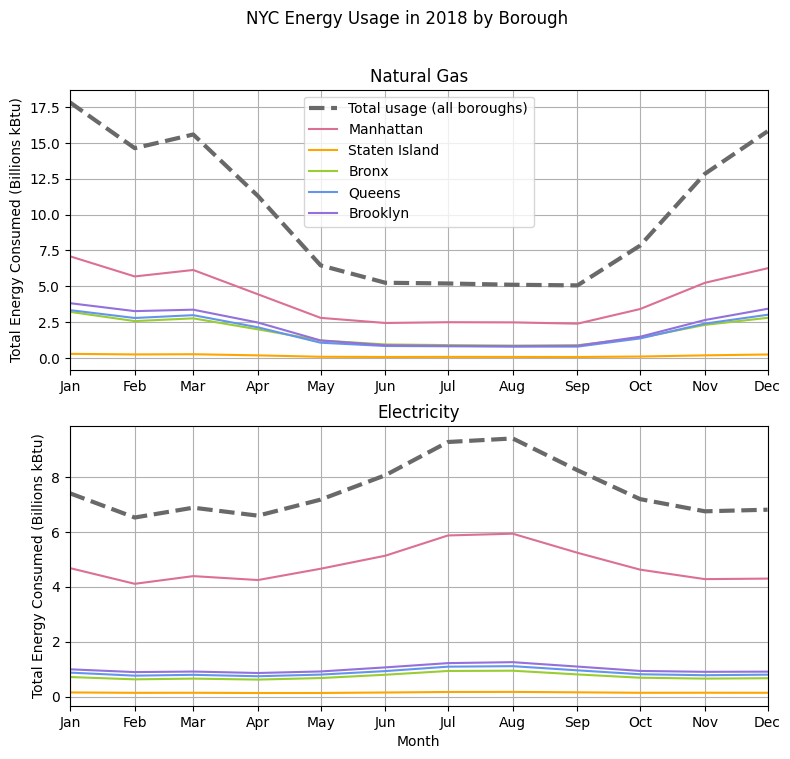

In [979]:
x = usage_all.index
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
colors = ['palevioletred', 'orange', 'yellowgreen', 'cornflowerblue', 'mediumpurple']

fig, axs = plt.subplots(2, figsize=(9,8))
fig.suptitle('NYC Energy Usage in 2018 by Borough')
# fig.supxlabel('Month', fontsize=12)

# gas plot
axs[0].set_title("Natural Gas")
axs[0].plot(x, y_gas_total, color='dimgrey', linestyle='--', linewidth=3, label='Total usage (all boroughs)')
# axs[0].plot(x, y_gas_med, color='dimgrey', linestyle='--', linewidth=3, label='Median usage (all boroughs)')
axs[0].set_xticks(x)
axs[0].set_xlim(x.min(), x.max())
axs[0].set_xticklabels(labels)
axs[0].set_ylabel('Total Energy Consumed (Billions kBtu)', fontsize=10)
axs[0].grid()

# electricity plot
axs[1].set_title("Electricity")
axs[1].plot(x, y_elec_total, color='dimgrey', linestyle='--', linewidth=3, label='Total usage (all boroughs)')
# axs[1].plot(x, y_elec_med, color='dimgrey', linestyle='--', linewidth=3, label='Median usage (all boroughs)')
axs[1].set_xticks(x)
axs[1].set_xlim(x.min(), x.max())
axs[1].set_xticklabels(labels)
axs[1].set_ylabel('Total Energy Consumed (Billions kBtu)', fontsize=10)
axs[1].set_xlabel('Month', fontsize=10)
axs[1].grid()

for i, borough in enumerate(df1['Borough'].unique()):
  temp = df3_boro_usage.xs(borough, level='Borough', axis=0)
  y_boro_gas = temp['Gas Usage']['sum']
  y_boro_elec = temp['Electricity Usage']['sum']
  if borough == 'STATEN IS':
    axs[0].plot(x, y_boro_gas, color=colors[i], label='Staten Island')
    axs[1].plot(x, y_boro_elec, color=colors[i], label='Staten Island')
  else:
    axs[0].plot(x, y_boro_gas, color=colors[i], label=borough.capitalize())
    axs[1].plot(x, y_boro_elec, color=colors[i], label=borough.capitalize())
    
axs[0].legend()
# axs[1].legend()   
fig.show()

In [622]:
df5_join_usage_temp = df5_join_usage_temp.reset_index(drop=True)
df5_join_usage_temp

,PID,PName,Type,Month,Gas Usage,Electricity Usage,Postcode,Borough,Degrees,NTA,NTA Code
0,1633020,X144-0200188,K-12 School,2018-01-01,0.000008,0.000244,10469,BRONX,100.3,Allerton-Pelham Gardens,bx3
1,1633020,X144-0200188,K-12 School,2018-02-01,0.000002,0.000227,10469,BRONX,100.3,Allerton-Pelham Gardens,bx3
2,1633020,X144-0200188,K-12 School,2018-03-01,0.000025,0.000197,10469,BRONX,100.3,Allerton-Pelham Gardens,bx3
3,1633020,X144-0200188,K-12 School,2018-04-01,0.000017,0.000136,10469,BRONX,100.3,Allerton-Pelham Gardens,bx3
4,1633020,X144-0200188,K-12 School,2018-05-01,0.000027,0.000158,10469,BRONX,100.3,Allerton-Pelham Gardens,bx3
...,...,...,...,...,...,...,...,...,...,...,...
272443,7139791,440 East 85th Street,Multifamily Housing,2018-08-01,0.000069,0.000092,10028,MANHATTAN,96.6,Yorkville,m5
272444,7139791,440 East 85th Street,Multifamily Housing,2018-09-01,0.000082,0.000070,10028,MANHATTAN,96.6,Yorkville,m5
272445,7139791,440 East 85th Street,Multifamily Housing,2018-10-01,0.000204,0.000050,10028,MANHATTAN,96.6,Yorkville,m5
272446,7139791,440 East 85th Street,Multifamily Housing,2018-11-01,0.000406,0.000046,10028,MANHATTAN,96.6,Yorkville,m5


-- Export as new CSV

In [623]:
df5_join_usage_temp.to_csv('/Users/agnespark/fds/data/monthly_usage_with_nta.csv', index=False)

-- Analysis by NTA group

In [996]:
df6_monthly_gas_nta = df5_join_usage_temp.groupby(['NTA Code', 'Month'])['Gas Usage'].agg(['sum'])
print(df6_monthly_gas_nta)

df6_monthly_elec_nta = df5_join_usage_temp.groupby(['NTA Code', 'Month'])['Electricity Usage'].agg(['sum'])
print(df6_monthly_elec_nta)

                          sum
NTA Code Month               
b1       2018-01-01  0.635455
         2018-02-01  0.563335
         2018-03-01  0.586332
         2018-04-01  0.413674
         2018-05-01  0.193834
...                       ...
s3       2018-08-01  0.011070
         2018-09-01  0.009555
         2018-10-01  0.009961
         2018-11-01  0.013179
         2018-12-01  0.016525

[360 rows x 1 columns]
                          sum
NTA Code Month               
b1       2018-01-01  0.140231
         2018-02-01  0.126623
         2018-03-01  0.128432
         2018-04-01  0.121110
         2018-05-01  0.135053
...                       ...
s3       2018-08-01  0.013221
         2018-09-01  0.013187
         2018-10-01  0.011789
         2018-11-01  0.011646
         2018-12-01  0.012242

[360 rows x 1 columns]


In [997]:
df6_monthly_gas_nta = df6_monthly_gas_nta.rename(columns={'sum': 'sum_gas_usage'})
df6_monthly_gas_nta

sum_gas_usage
NTA Code Month                    
b1       2018-01-01       0.635455
         2018-02-01       0.563335
         2018-03-01       0.586332
         2018-04-01       0.413674
         2018-05-01       0.193834
...                            ...
s3       2018-08-01       0.011070
         2018-09-01       0.009555
         2018-10-01       0.009961
         2018-11-01       0.013179
         2018-12-01       0.016525

[360 rows x 1 columns]

In [998]:
df6_monthly_elec_nta = df6_monthly_elec_nta.rename(columns={'sum': 'sum_elec_usage'})
df6_monthly_elec_nta

sum_elec_usage
NTA Code Month                     
b1       2018-01-01        0.140231
         2018-02-01        0.126623
         2018-03-01        0.128432
         2018-04-01        0.121110
         2018-05-01        0.135053
...                             ...
s3       2018-08-01        0.013221
         2018-09-01        0.013187
         2018-10-01        0.011789
         2018-11-01        0.011646
         2018-12-01        0.012242

[360 rows x 1 columns]

-- Find highest and lowest users

In [999]:
df7_elec_agg_nta = df6_monthly_elec_nta.droplevel(level=1)
df7_elec_agg_nta.reset_index(inplace=True)
df7_elec_agg_nta = df7_elec_agg_nta.groupby('NTA Code').agg(['sum', 'median', 'std'])
df7_elec_agg_nta = df7_elec_agg_nta.droplevel(level=0, axis=1)
df7_elec_agg_nta.sort_values(by=['sum'], ascending=False, inplace=True)
df7_elec_agg_nta.head(5)

,sum,median,std
NTA Code,,,
m4,20.470645,1.664830,0.200198
m1,9.461020,0.761385,0.084934
m3,6.524483,0.522937,0.072768
m5,6.176095,0.491045,0.079963
q1,5.280059,0.407665,0.066372


In [1000]:
df7_gas_agg_nta = df6_monthly_gas_nta.droplevel(level=1)
df7_gas_agg_nta.reset_index(inplace=True)
df7_gas_agg_nta = df7_gas_agg_nta.groupby('NTA Code').agg(['sum', 'median', 'std'])
df7_gas_agg_nta = df7_gas_agg_nta.droplevel(level=0, axis=1)
df7_gas_agg_nta.sort_values(by=['sum'], ascending=False, inplace=True)
df7_gas_agg_nta.head(5)

,sum,median,std
NTA Code,,,
q1,10.429371,0.801337,0.496010
m5,8.704283,0.660658,0.252344
m4,8.418788,0.653281,0.267399
m7,7.453816,0.591235,0.247828
m3,6.686974,0.502024,0.229675


In [1001]:
top5_gas_nta_arr = df7_gas_agg_nta.index[:5].to_numpy()
top5_elec_nta_arr = df7_elec_agg_nta.index[:5].to_numpy()

In [1002]:
df8_monthly_gas_nta_med = df5_join_usage_temp.groupby(['NTA Code', 'Month'])['Gas Usage'].agg(['sum'])
d = df8_monthly_gas_nta_med.droplevel(level=0)
d = d.reset_index()
d = d.groupby('Month')['sum'].agg('median')
y_nta_gas_med = d.to_numpy()

In [1003]:
df8_monthly_elec_nta_med = df5_join_usage_temp.groupby(['NTA Code', 'Month'])['Electricity Usage'].agg(['sum'])
d = df8_monthly_elec_nta_med.droplevel(level=0)
d = d.reset_index()
d = d.groupby('Month')['sum'].agg('median')
y_nta_elec_med = d.to_numpy()

/var/folders/xn/qrxty1f53b78940x_dlxnkk00000gn/T/ipykernel_12435/3266188135.py:39: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  nta_fig.show()


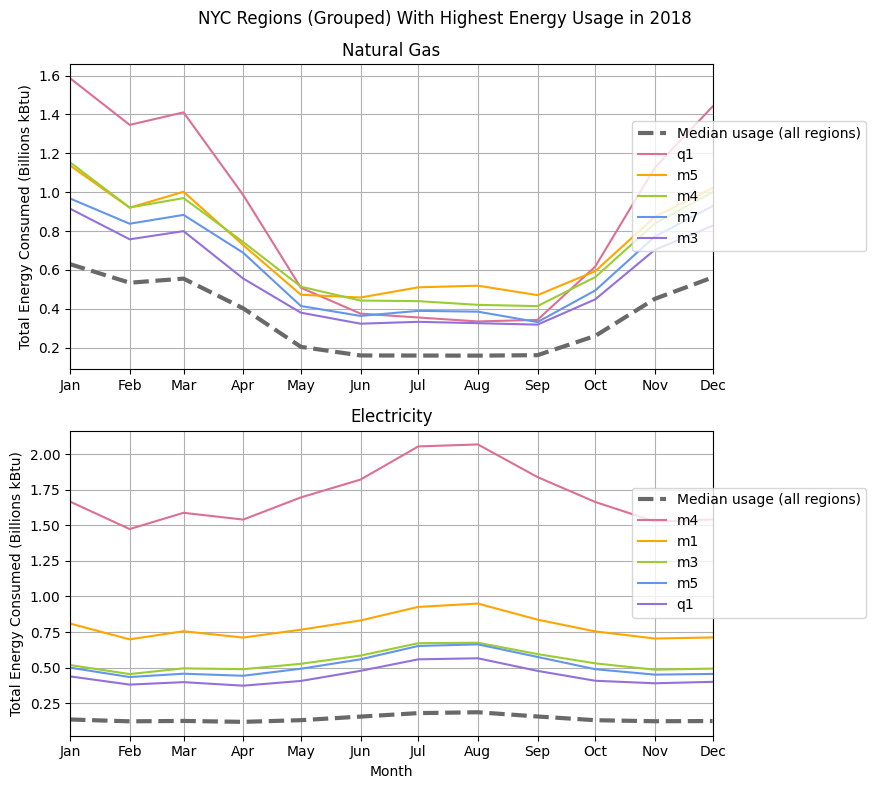

In [1004]:
x = df2_total_usage.index # list of datetimes

nta_fig, nta_axs = plt.subplots(2, figsize=(9,8))
nta_fig.suptitle('NYC Regions (Grouped) With Highest Energy Usage in 2018')

# plot means
# gas plot
nta_axs[0].set_title("Natural Gas")
nta_axs[0].plot(x, y_nta_gas_med, color='dimgrey', linestyle='--', linewidth=3, label='Median usage (all regions)')
nta_axs[0].set_xticks(x)
nta_axs[0].set_xlim(x.min(), x.max())
nta_axs[0].set_xticklabels(labels)
nta_axs[0].set_ylabel('Total Energy Consumed (Billions kBtu)', fontsize=10)
nta_axs[0].grid()

# electricity plot
nta_axs[1].set_title("Electricity")
nta_axs[1].plot(x, y_nta_elec_med, color='dimgrey', linestyle='--', linewidth=3, label='Median usage (all regions)')
nta_axs[1].set_xticks(x)
nta_axs[1].set_xlim(x.min(), x.max())
nta_axs[1].set_xticklabels(labels)
nta_axs[1].set_ylabel('Total Energy Consumed (Billions kBtu)', fontsize=10)
nta_axs[1].set_xlabel('Month', fontsize=10)
nta_axs[1].grid()

for i, nta_code in enumerate(top5_gas_nta_arr):
  temp = df5_join_usage_temp[df5_join_usage_temp['NTA Code'] == nta_code].groupby('Month')['Gas Usage'].agg('sum')
  y_nta_gas = temp.to_numpy()
  nta_axs[0].plot(x, y_nta_gas, color=colors[i], label=nta_code)
  
for i, nta_code in enumerate(top5_elec_nta_arr):
  temp = df5_join_usage_temp[df5_join_usage_temp['NTA Code'] == nta_code].groupby('Month')['Electricity Usage'].agg('sum')
  y_nta_elec = temp.to_numpy()
  nta_axs[1].plot(x, y_nta_elec, color=colors[i], label=nta_code)
  
nta_axs[0].legend(bbox_to_anchor = (1.25, 0.6), loc='center right')
nta_axs[1].legend(bbox_to_anchor = (1.25, 0.6), loc='center right')
nta_fig.tight_layout()   
nta_fig.show()

-- Analysis by PIDs

In [783]:
df9 = monthly_usage_df.groupby('PID')[['Gas Usage', 'Electricity Usage']].agg(['sum', 'median', 'std'])
df9

Gas Usage                     Electricity Usage                    
              sum    median       std               sum    median       std
PID                                                                        
7365     0.000996  0.000083  0.000000          0.023995  0.001981  0.000125
8139     0.000996  0.000083  0.000000          0.017309  0.001422  0.000158
8604     0.000963  0.000079  0.000007          0.025783  0.002052  0.000278
8841     0.000996  0.000083  0.000000          0.015906  0.001288  0.000120
11809    0.037499  0.003040  0.002432          0.109259  0.009039  0.000657
...           ...       ...       ...               ...       ...       ...
7538500  0.000666  0.000053  0.000009          0.001338  0.000104  0.000022
7538585  0.000996  0.000083  0.000000          0.001153  0.000091  0.000019
7538695  0.006444  0.000581  0.000385          0.000780  0.000061  0.000022
7538696  0.005251  0.000340  0.000378          0.006000  0.000489  0.000063
7538772  0.001496  0.000125  0.000000          0.001561  0.000129  0.000023

[22704 rows x 6 columns]

In [789]:
gas_med = df9['Gas Usage', 'sum'].median()
elec_med = df9['Electricity Usage', 'sum'].median()

print(f"Median gas usage: {gas_med:.4f} billion kBtu")
print(f"Median electricity usage: {elec_med:.4f} billion kBtu")

Median gas usage: 0.0028 billion kBtu
Median electricity usage: 0.0013 billion kBtu


In [824]:
top10_gas = df9['Gas Usage', 'sum'].quantile(.9)
top10_elec = df9['Electricity Usage', 'sum'].quantile(.9)

print(f"90th quantile of gas usage: {top10_gas:.4f} billion kBtu")
print(f"90th quantile of electricity usage: {top10_elec:.4f} billion kBtu")

90th quantile of gas usage: 0.0093 billion kBtu
90th quantile of electricity usage: 0.0073 billion kBtu


-- Find PIDs in top 10th percentile and calculate usage

In [815]:
df10_top10_gas_pids = df9[df9['Gas Usage', 'sum'] >= top10_gas]
df10_top10_elec_pids = df9[df9['Electricity Usage', 'sum'] >= top10_elec]

In [816]:
df10_top10_gas_pids

Gas Usage                     Electricity Usage                    
              sum    median       std               sum    median       std
PID                                                                        
11809    0.037499  0.003040  0.002432          0.109259  0.009039  0.000657
28402    1.558592  0.127868  0.014359          0.095260  0.007145  0.001870
1143934  0.013873  0.001176  0.000984          0.091996  0.007789  0.000939
1151970  0.021375  0.001242  0.001820          0.053444  0.004360  0.000383
1216329  0.037633  0.002802  0.001866          0.032386  0.002563  0.000584
...           ...       ...       ...               ...       ...       ...
7441729  0.010944  0.000921  0.000030          0.000922  0.000075  0.000005
7468626  0.016388  0.001356  0.000451          0.007716  0.000660  0.000119
7530300  0.012174  0.000990  0.000140          0.016847  0.001409  0.000463
7533963  0.010084  0.000901  0.000479          0.003202  0.000254  0.000055
7537935  0.010848  0.000803  0.000465          0.009600  0.000805  0.000121

[2271 rows x 6 columns]

In [817]:
df10_top10_elec_pids

Gas Usage                     Electricity Usage                    
              sum    median       std               sum    median       std
PID                                                                        
7365     0.000996  0.000083  0.000000          0.023995  0.001981  0.000125
8139     0.000996  0.000083  0.000000          0.017309  0.001422  0.000158
8604     0.000963  0.000079  0.000007          0.025783  0.002052  0.000278
8841     0.000996  0.000083  0.000000          0.015906  0.001288  0.000120
11809    0.037499  0.003040  0.002432          0.109259  0.009039  0.000657
...           ...       ...       ...               ...       ...       ...
7529691  0.001448  0.000120  0.000032          0.008022  0.000612  0.000139
7530300  0.012174  0.000990  0.000140          0.016847  0.001409  0.000463
7530319  0.006505  0.000637  0.000237          0.010772  0.000864  0.000113
7534243  0.000329  0.000007  0.000069          0.016706  0.001382  0.000242
7537935  0.010848  0.000803  0.000465          0.009600  0.000805  0.000121

[2271 rows x 6 columns]

In [818]:
top10_gas_pids_arr = df10_top10_gas_pids.index.to_numpy()
top10_elec_pids_arr = df10_top10_elec_pids.index.to_numpy()

In [820]:
# pids in bottom 90th quantile
df10_not10_gas_pids = df9[df9['Gas Usage', 'sum'] < top10_gas]
df10_not10_elec_pids = df9[df9['Electricity Usage', 'sum'] < top10_elec]

In [821]:
df10_not10_gas_pids

Gas Usage                     Electricity Usage                    
              sum    median       std               sum    median       std
PID                                                                        
7365     0.000996  0.000083  0.000000          0.023995  0.001981  0.000125
8139     0.000996  0.000083  0.000000          0.017309  0.001422  0.000158
8604     0.000963  0.000079  0.000007          0.025783  0.002052  0.000278
8841     0.000996  0.000083  0.000000          0.015906  0.001288  0.000120
1045358  0.001366  0.000114  0.000000          0.048291  0.003985  0.000426
...           ...       ...       ...               ...       ...       ...
7538500  0.000666  0.000053  0.000009          0.001338  0.000104  0.000022
7538585  0.000996  0.000083  0.000000          0.001153  0.000091  0.000019
7538695  0.006444  0.000581  0.000385          0.000780  0.000061  0.000022
7538696  0.005251  0.000340  0.000378          0.006000  0.000489  0.000063
7538772  0.001496  0.000125  0.000000          0.001561  0.000129  0.000023

[20433 rows x 6 columns]

In [825]:
print(df10_top10_gas_pids.shape, df10_not10_gas_pids.shape)
print(df10_top10_elec_pids.shape, df10_not10_elec_pids.shape)

(2271, 6) (20433, 6)
(2271, 6) (20433, 6)


In [847]:
not10_gas_pids_arr = df10_not10_gas_pids.index.to_numpy()
not10_elec_pids_arr = df10_not10_elec_pids.index.to_numpy()

In [848]:
total_gas_top10 = df10_top10_gas_pids['Gas Usage', 'sum'].sum()
total_gas_not10 = df10_not10_gas_pids['Gas Usage', 'sum'].sum()

total_elec_top10 = df10_top10_elec_pids['Electricity Usage', 'sum'].sum()
total_elec_not10 = df10_not10_elec_pids['Electricity Usage', 'sum'].sum()

In [849]:
print(f"Total gas usage by top 10th quantile of gas users: {total_gas_top10:.4f} billion kBtu")
print(f"Total gas usage by bottom 90th quantile of gas users: {total_gas_not10:.4f} billion kBtu")

print(f"Total electricity usage by top 10th quantile of electricity users: {total_elec_top10:.4f} billion kBtu")
print(f"Total electricity usage by bottom 90th quantile of electricity users: {total_elec_not10:.4f} billion kBtu")

Total gas usage by top 10th quantile of gas users: 64.5199 billion kBtu
Total gas usage by bottom 90th quantile of gas users: 58.3419 billion kBtu
Total electricity usage by top 10th quantile of electricity users: 55.6215 billion kBtu
Total electricity usage by bottom 90th quantile of electricity users: 34.6132 billion kBtu


In [850]:
top10_gas_monthly_usage_arr = monthly_usage_df[monthly_usage_df['PID'].isin(top10_gas_pids_arr)].groupby('Month')['Gas Usage'].agg('sum').to_numpy()
y_top10_gas = top10_gas_monthly_usage_arr

top10_elec_monthly_usage_arr = monthly_usage_df[monthly_usage_df['PID'].isin(top10_elec_pids_arr)].groupby('Month')['Electricity Usage'].agg('sum').to_numpy()
y_top10_elec = top10_elec_monthly_usage_arr

not10_gas_monthly_usage_arr = monthly_usage_df[monthly_usage_df['PID'].isin(not10_gas_pids_arr)].groupby('Month')['Gas Usage'].agg('sum').to_numpy()
y_not10_gas = not10_gas_monthly_usage_arr

not10_elec_monthly_usage_arr = monthly_usage_df[monthly_usage_df['PID'].isin(not10_elec_pids_arr)].groupby('Month')['Electricity Usage'].agg('sum').to_numpy()
y_not10_elec = not10_elec_monthly_usage_arr

/var/folders/xn/qrxty1f53b78940x_dlxnkk00000gn/T/ipykernel_12435/1243849228.py:32: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  t_fig.show()


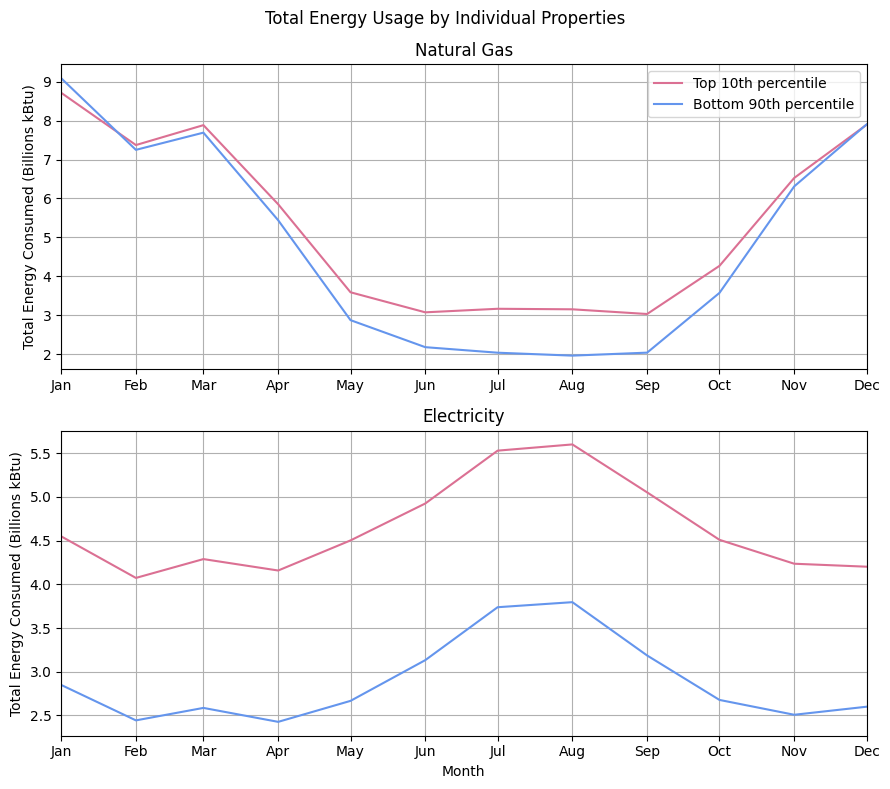

In [897]:
x = df2_total_usage.index # list of datetimes

t_fig, t_axs = plt.subplots(2, figsize=(9,8))
t_fig.suptitle('Total Energy Usage by Individual Properties')

# plot means
# gas plot
t_axs[0].set_title("Natural Gas")
# nta_axs[0].plot(x, y_nta_gas, color='dimgrey', linewidth=3, label='All')
t_axs[0].plot(x, y_top10_gas, color=colors[0], label='Top 10th percentile')
t_axs[0].plot(x, y_not10_gas, color=colors[3], label='Bottom 90th percentile')
t_axs[0].set_xticks(x)
t_axs[0].set_xlim(x.min(), x.max())
t_axs[0].set_xticklabels(labels)
t_axs[0].set_ylabel('Total Energy Consumed (Billions kBtu)', fontsize=10)
t_axs[0].grid()

# electricity plot
t_axs[1].set_title("Electricity")
# nta_axs[1].plot(x, y_nta_elec, color='dimgrey', linestyle='--', linewidth=3, label='All')
t_axs[1].plot(x, y_top10_elec, color=colors[0], label='Top 10th percentile')
t_axs[1].plot(x, y_not10_elec, color=colors[3], label='Bottom 90th percentile')
t_axs[1].set_xticks(x)
t_axs[1].set_xlim(x.min(), x.max())
t_axs[1].set_xticklabels(labels)
t_axs[1].set_ylabel('Total Energy Consumed (Billions kBtu)', fontsize=10)
t_axs[1].set_xlabel('Month', fontsize=10)
t_axs[1].grid()
  
t_axs[0].legend()
t_fig.tight_layout()   
t_fig.show()

-- Calculate LST averages per boro

In [914]:
lsf_df

,Time,GeoType,GeoID,GeoRank,Geography,Degrees Fahrenheit
0,2018,NTA2010,501,8,Claremont-Bathgate,100.0
1,2018,NTA2010,503,8,Eastchester-Edenwald-Baychester,99.8
2,2018,NTA2010,505,8,Bedford Park-Fordham North,97.4
3,2018,NTA2010,506,8,Belmont,98.7
4,2018,NTA2010,507,8,Bronxdale,98.4
...,...,...,...,...,...,...
183,2018,NTA2010,8536,8,Old Town-Dongan Hills-South Beach,97.1
184,2018,NTA2010,8537,8,Stapleton-Rosebank,96.4
185,2018,NTA2010,8545,8,New Dorp-Midland Beach,99.1
186,2018,NTA2010,8548,8,Arden Heights,97.7


In [921]:
df11_join_lsf_nta = lsf_df.drop(columns=['Time', 'GeoType', 'GeoID', 'GeoRank'])
df11_join_lsf_nta['NTA Code'] = np.nan
df11_join_lsf_nta

,Geography,Degrees Fahrenheit,NTA Code
0,Claremont-Bathgate,100.0,NaN
1,Eastchester-Edenwald-Baychester,99.8,NaN
2,Bedford Park-Fordham North,97.4,NaN
3,Belmont,98.7,NaN
4,Bronxdale,98.4,NaN
...,...,...,...
183,Old Town-Dongan Hills-South Beach,97.1,NaN
184,Stapleton-Rosebank,96.4,NaN
185,New Dorp-Midland Beach,99.1,NaN
186,Arden Heights,97.7,NaN


In [922]:
for borough, region_codes in regions.items():
  for code, list_of_areas in region_codes.items():
    df11_join_lsf_nta.loc[df11_join_lsf_nta['Geography'].isin(list_of_areas), 'NTA Code'] = code

In [923]:
df11_join_lsf_nta

,Geography,Degrees Fahrenheit,NTA Code
0,Claremont-Bathgate,100.0,bx5
1,Eastchester-Edenwald-Baychester,99.8,bx2
2,Bedford Park-Fordham North,97.4,bx4
3,Belmont,98.7,bx4
4,Bronxdale,98.4,bx3
...,...,...,...
183,Old Town-Dongan Hills-South Beach,97.1,s2
184,Stapleton-Rosebank,96.4,s1
185,New Dorp-Midland Beach,99.1,s2
186,Arden Heights,97.7,s3


In [924]:
df5_join_usage_temp

,PID,PName,Type,Month,Gas Usage,Electricity Usage,Postcode,Borough,Degrees,NTA,NTA Code
0,1633020,X144-0200188,K-12 School,2018-01-01,0.000008,0.000244,10469,BRONX,100.3,Allerton-Pelham Gardens,bx3
1,1633020,X144-0200188,K-12 School,2018-02-01,0.000002,0.000227,10469,BRONX,100.3,Allerton-Pelham Gardens,bx3
2,1633020,X144-0200188,K-12 School,2018-03-01,0.000025,0.000197,10469,BRONX,100.3,Allerton-Pelham Gardens,bx3
3,1633020,X144-0200188,K-12 School,2018-04-01,0.000017,0.000136,10469,BRONX,100.3,Allerton-Pelham Gardens,bx3
4,1633020,X144-0200188,K-12 School,2018-05-01,0.000027,0.000158,10469,BRONX,100.3,Allerton-Pelham Gardens,bx3
...,...,...,...,...,...,...,...,...,...,...,...
272443,7139791,440 East 85th Street,Multifamily Housing,2018-08-01,0.000069,0.000092,10028,MANHATTAN,96.6,Yorkville,m5
272444,7139791,440 East 85th Street,Multifamily Housing,2018-09-01,0.000082,0.000070,10028,MANHATTAN,96.6,Yorkville,m5
272445,7139791,440 East 85th Street,Multifamily Housing,2018-10-01,0.000204,0.000050,10028,MANHATTAN,96.6,Yorkville,m5
272446,7139791,440 East 85th Street,Multifamily Housing,2018-11-01,0.000406,0.000046,10028,MANHATTAN,96.6,Yorkville,m5


In [942]:
ntas = df11_join_lsf_nta['Geography'].unique()

df12_geo_total_usage = df5_join_usage_temp[['PID', 'Month', 'Gas Usage', 'Electricity Usage', 'NTA', 'Borough']]
df12_geo_total_usage

# groupby('Month')[['Gas Usage', 'Electricity Usage']].agg(['sum', 'mean', 'median', 'min', 'max'])
# months = df2_total_usage.index

,PID,Month,Gas Usage,Electricity Usage,NTA,Borough
0,1633020,2018-01-01,0.000008,0.000244,Allerton-Pelham Gardens,BRONX
1,1633020,2018-02-01,0.000002,0.000227,Allerton-Pelham Gardens,BRONX
2,1633020,2018-03-01,0.000025,0.000197,Allerton-Pelham Gardens,BRONX
3,1633020,2018-04-01,0.000017,0.000136,Allerton-Pelham Gardens,BRONX
4,1633020,2018-05-01,0.000027,0.000158,Allerton-Pelham Gardens,BRONX
...,...,...,...,...,...,...
272443,7139791,2018-08-01,0.000069,0.000092,Yorkville,MANHATTAN
272444,7139791,2018-09-01,0.000082,0.000070,Yorkville,MANHATTAN
272445,7139791,2018-10-01,0.000204,0.000050,Yorkville,MANHATTAN
272446,7139791,2018-11-01,0.000406,0.000046,Yorkville,MANHATTAN


In [943]:
df12_geo_total_usage = df12_geo_total_usage.groupby(['NTA', 'Month'])[['Gas Usage', 'Electricity Usage']].agg(['sum'])
df12_geo_total_usage 

Gas Usage Electricity Usage
                                         sum               sum
NTA                     Month                                 
Allerton-Pelham Gardens 2018-01-01  0.014065          0.004622
                        2018-02-01  0.009492          0.003509
                        2018-03-01  0.009899          0.003743
                        2018-04-01  0.007373          0.003383
                        2018-05-01  0.004147          0.003548
...                                      ...               ...
Yorkville               2018-08-01  0.090261          0.127192
                        2018-09-01  0.091505          0.103899
                        2018-10-01  0.139234          0.084170
                        2018-11-01  0.223569          0.078590
                        2018-12-01  0.269605          0.080868

[2256 rows x 2 columns]

In [953]:
df13_geo_total_usage_sum = df12_geo_total_usage.droplevel(level=1)  
df13_geo_total_usage_sum.reset_index(inplace=True)
df13_geo_total_usage_sum

,NTA,Gas Usage,Electricity Usage
,,sum,sum
0,Allerton-Pelham Gardens,0.014065,0.004622
1,Allerton-Pelham Gardens,0.009492,0.003509
2,Allerton-Pelham Gardens,0.009899,0.003743
3,Allerton-Pelham Gardens,0.007373,0.003383
4,Allerton-Pelham Gardens,0.004147,0.003548
...,...,...,...
2251,Yorkville,0.090261,0.127192
2252,Yorkville,0.091505,0.103899
2253,Yorkville,0.139234,0.084170


In [954]:
df14 = df13_geo_total_usage_sum.droplevel(level=1, axis=1)
df14 = df14.groupby('NTA')[['Gas Usage', 'Electricity Usage']].agg(['sum'])
df15 = df14.droplevel(level=1, axis=1)
df15.reset_index(inplace=True)
df15

,NTA,Gas Usage,Electricity Usage
0,Allerton-Pelham Gardens,0.081395,0.047816
1,Annadale-Huguenot-Prince's Bay-Eltingville,0.083626,0.041633
2,Arden Heights,0.000206,0.006046
3,Astoria,0.434941,0.248937
4,Auburndale,0.022231,0.023853
...,...,...,...
183,Windsor Terrace,0.228542,0.076846
184,Woodhaven,0.140906,0.050293
185,Woodlawn-Wakefield,0.117935,0.057719
186,Woodside,0.401719,0.132165


In [968]:
df16 = df11_join_lsf_nta.set_index('Geography').join(df15.set_index('NTA'))

,Degrees Fahrenheit,NTA Code,Gas Usage,Electricity Usage
Geography,,,,
Claremont-Bathgate,100.0,bx5,0.297355,0.156454
Eastchester-Edenwald-Baychester,99.8,bx2,0.207912,0.060711
Bedford Park-Fordham North,97.4,bx4,0.809396,0.291049
Belmont,98.7,bx4,0.435592,0.250672
Bronxdale,98.4,bx3,0.426197,0.165900
...,...,...,...,...
Old Town-Dongan Hills-South Beach,97.1,s2,0.189419,0.118843
Stapleton-Rosebank,96.4,s1,0.109747,0.083166
New Dorp-Midland Beach,99.1,s2,0.046616,0.039879


In [973]:
df19.reset_index(inplace=True)
df19 = df16.drop(columns=['NTA Code', 'Geography'])
df19.rename(columns={'Degrees Fahrenheit': 'nta#avg_surface_temp', 'Gas Usage': 'nta#total_gas_usage', 'Electricity Usage': 'nta#total_elec_usage'}, inplace=True)
df19

,nta#avg_surface_temp,nta#total_gas_usage,nta#total_elec_usage
0,100.0,0.297355,0.156454
1,99.8,0.207912,0.060711
2,97.4,0.809396,0.291049
3,98.7,0.435592,0.250672
4,98.4,0.426197,0.165900
...,...,...,...
183,97.1,0.189419,0.118843
184,96.4,0.109747,0.083166
185,99.1,0.046616,0.039879
186,97.7,0.000206,0.006046


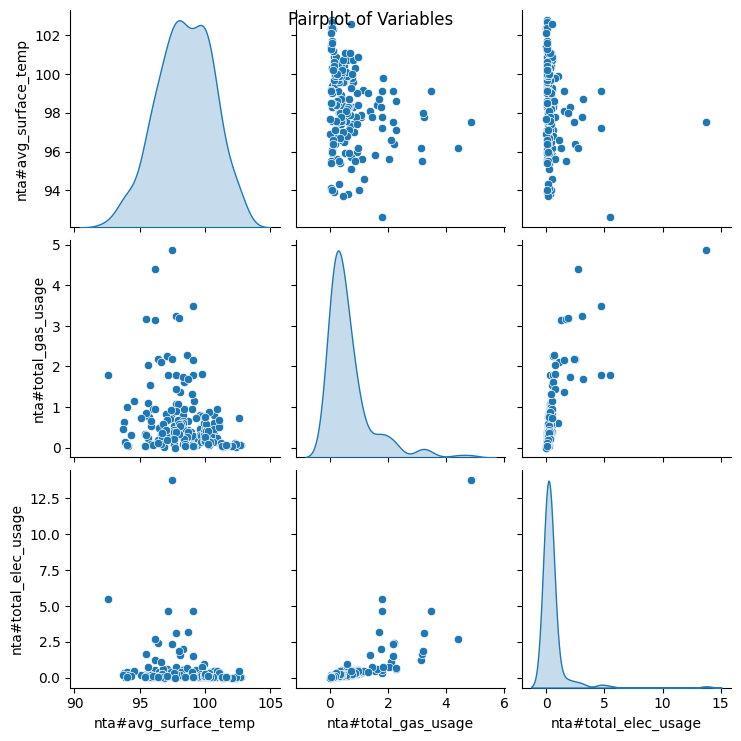

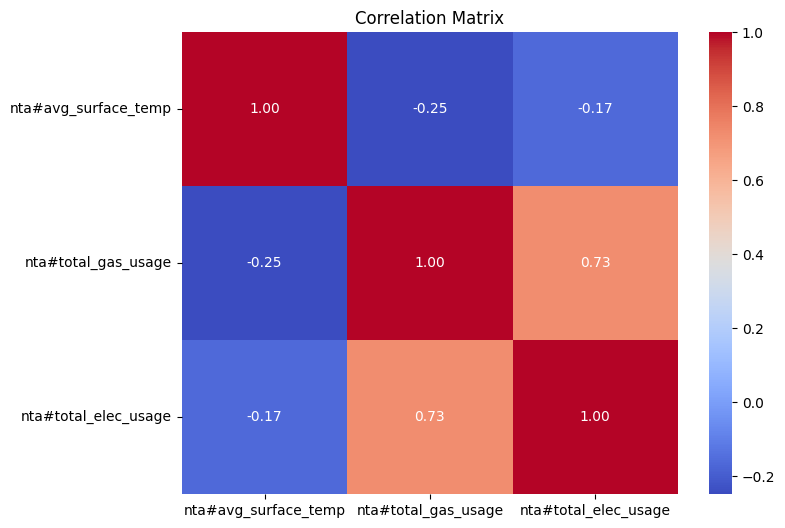

In [974]:
# Visualization
sns.pairplot(df19, kind='scatter', diag_kind='kde')
plt.suptitle('Pairplot of Variables')
plt.show()

# Correlation Matrix
correlation_matrix = df19.corr()

# Heatmap for correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [969]:
df16.reset_index(inplace=True)
df17 = df16.groupby('NTA Code')[['Degrees Fahrenheit', 'Gas Usage', 'Electricity Usage']].agg({'Degrees Fahrenheit': ['mean'], 'Gas Usage': ['sum'], 'Electricity Usage': ['sum']})
df18 = df17.droplevel(level=1, axis=1)
df18.rename(columns={'Degrees Fahrenheit': 'nta_group#avg_surface_temp', 'Gas Usage': 'nta_group#total_gas_usage', 'Electricity Usage': 'nta_group#total_elec_usage'}, inplace=True)
df18

,nta_group#avg_surface_temp,nta_group#total_gas_usage,nta_group#total_elec_usage
NTA Code,,,
b1,96.790909,4.235815,1.739213
b2,99.725000,1.752476,1.333177
b3,99.000000,2.875190,1.280810
b4,99.371429,2.052966,1.026806
b5,97.057143,4.436142,3.343100
b6,97.362500,3.965909,1.536822
b7,99.200000,5.953941,1.663948
bx1,95.960000,4.048482,1.539482
bx2,99.300000,0.716639,0.269605


In [963]:
# df18.reset_index(inplace=True)
# df18

,NTA Code,mean_temp,total_gas_usage,total_elec_usage
0,b1,96.790909,4.235815,1.739213
1,b2,99.725000,1.752476,1.333177
2,b3,99.000000,2.875190,1.280810
3,b4,99.371429,2.052966,1.026806
4,b5,97.057143,4.436142,3.343100
5,b6,97.362500,3.965909,1.536822
6,b7,99.200000,5.953941,1.663948
7,bx1,95.960000,4.048482,1.539482
8,bx2,99.300000,0.716639,0.269605
9,bx3,99.250000,5.580785,2.071684


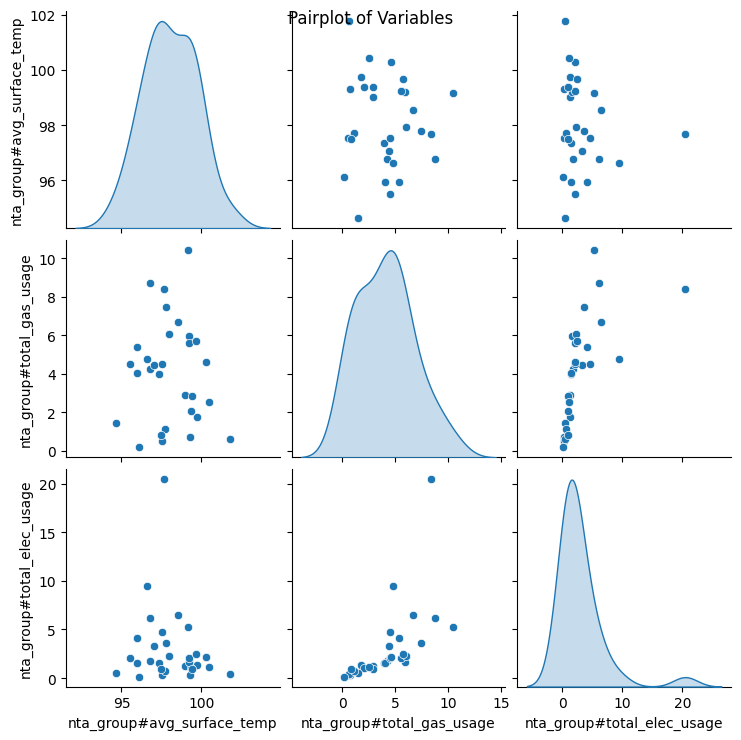

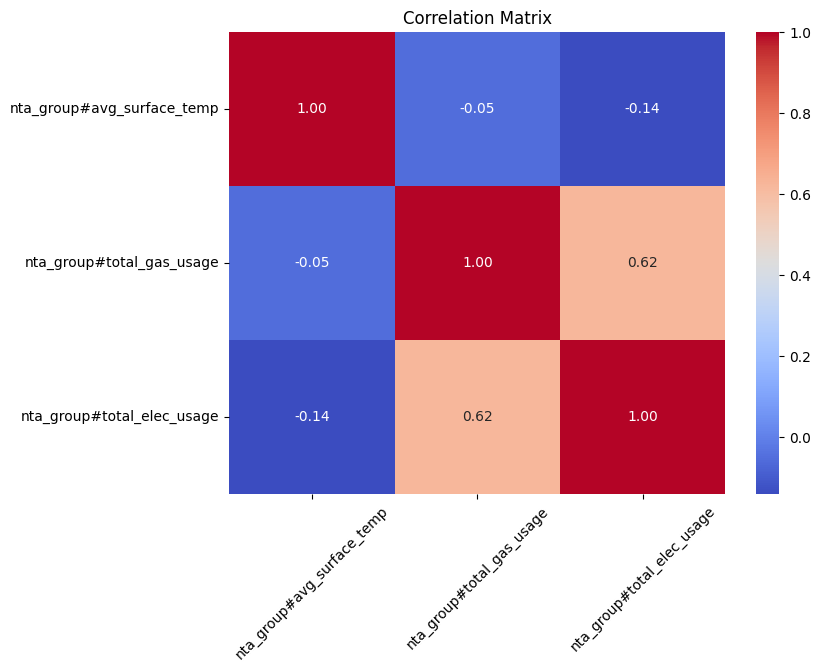

In [975]:
import seaborn as sns

# Visualization
sns.pairplot(df18, kind='scatter', diag_kind='kde')
plt.suptitle('Pairplot of Variables')
plt.show()

# Correlation Matrix
correlation_matrix = df18.corr()

# Heatmap for correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.show()

In [1205]:
len(df5_join_usage_temp['NTA'].unique())

188

In [1005]:
df6a_monthly_gas_nta = df5_join_usage_temp.groupby(['NTA', 'Month'])['Gas Usage'].agg(['sum'])
print(df6a_monthly_gas_nta)

df6a_monthly_elec_nta = df5_join_usage_temp.groupby(['NTA', 'Month'])['Electricity Usage'].agg(['sum'])
print(df6a_monthly_elec_nta)

                                         sum
NTA                     Month               
Allerton-Pelham Gardens 2018-01-01  0.014065
                        2018-02-01  0.009492
                        2018-03-01  0.009899
                        2018-04-01  0.007373
                        2018-05-01  0.004147
...                                      ...
Yorkville               2018-08-01  0.090261
                        2018-09-01  0.091505
                        2018-10-01  0.139234
                        2018-11-01  0.223569
                        2018-12-01  0.269605

[2256 rows x 1 columns]
                                         sum
NTA                     Month               
Allerton-Pelham Gardens 2018-01-01  0.004622
                        2018-02-01  0.003509
                        2018-03-01  0.003743
                        2018-04-01  0.003383
                        2018-05-01  0.003548
...                                      ...
Yorkville               2018-0

In [1006]:
df6a_monthly_gas_nta = df6a_monthly_gas_nta.rename(columns={'sum': 'sum_gas_usage'})
df6a_monthly_gas_nta
df6a_monthly_elec_nta = df6a_monthly_elec_nta.rename(columns={'sum': 'sum_elec_usage'})
df6a_monthly_elec_nta

sum_elec_usage
NTA                     Month                     
Allerton-Pelham Gardens 2018-01-01        0.004622
                        2018-02-01        0.003509
                        2018-03-01        0.003743
                        2018-04-01        0.003383
                        2018-05-01        0.003548
...                                            ...
Yorkville               2018-08-01        0.127192
                        2018-09-01        0.103899
                        2018-10-01        0.084170
                        2018-11-01        0.078590
                        2018-12-01        0.080868

[2256 rows x 1 columns]

In [1007]:
df7a_elec_agg_nta = df6a_monthly_elec_nta.droplevel(level=1)
df7a_elec_agg_nta.reset_index(inplace=True)
df7a_elec_agg_nta = df7a_elec_agg_nta.groupby('NTA').agg(['sum', 'median', 'std'])
df7a_elec_agg_nta = df7a_elec_agg_nta.droplevel(level=0, axis=1)
df7a_elec_agg_nta.sort_values(by=['sum'], ascending=False, inplace=True)
df7a_elec_agg_nta.head(5)

,sum,median,std
NTA,,,
Midtown-Midtown South,13.766386,1.118638,0.128637
Battery Park City-Lower Manhattan,5.450737,0.442807,0.043846
Turtle Bay-East Midtown,4.680752,0.380490,0.052493
Hudson Yards-Chelsea-Flatiron-Union Square,4.675118,0.377687,0.049665
SoHo-TriBeCa-Civic Center-Little Italy,3.153596,0.254621,0.029869


In [1008]:
df7a_gas_agg_nta = df6a_monthly_gas_nta.droplevel(level=1)
df7a_gas_agg_nta.reset_index(inplace=True)
df7a_gas_agg_nta = df7a_gas_agg_nta.groupby('NTA').agg(['sum', 'median', 'std'])
df7a_gas_agg_nta = df7a_gas_agg_nta.droplevel(level=0, axis=1)
df7a_gas_agg_nta.sort_values(by=['sum'], ascending=False, inplace=True)
df7a_gas_agg_nta.head(5)

,sum,median,std
NTA,,,
Midtown-Midtown South,4.873785,0.375962,0.136476
Lenox Hill-Roosevelt Island,4.401823,0.346229,0.071494
Hudson Yards-Chelsea-Flatiron-Union Square,3.479854,0.260437,0.146443
Murray Hill-Kips Bay,3.239415,0.248358,0.056266
West Village,3.207119,0.241587,0.083638


In [1009]:
top5a_gas_nta_arr = df7a_gas_agg_nta.index[:5].to_numpy()
top5a_elec_nta_arr = df7a_elec_agg_nta.index[:5].to_numpy()

df8a_monthly_gas_nta_med = df5_join_usage_temp.groupby(['NTA', 'Month'])['Gas Usage'].agg(['sum'])
d1 = df8a_monthly_gas_nta_med.droplevel(level=0)
d1 = d1.reset_index()
d1 = d1.groupby('Month')['sum'].agg('median')
y_nta_gas_med_a = d.to_numpy()

df8a_monthly_elec_nta_med = df5_join_usage_temp.groupby(['NTA', 'Month'])['Electricity Usage'].agg(['sum'])
d2 = df8a_monthly_elec_nta_med.droplevel(level=0)
d2 = d2.reset_index()
d2 = d2.groupby('Month')['sum'].agg('median')
y_nta_elec_med_a = d2.to_numpy()

/var/folders/xn/qrxty1f53b78940x_dlxnkk00000gn/T/ipykernel_12435/2579030566.py:39: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  nta_fig2.show()


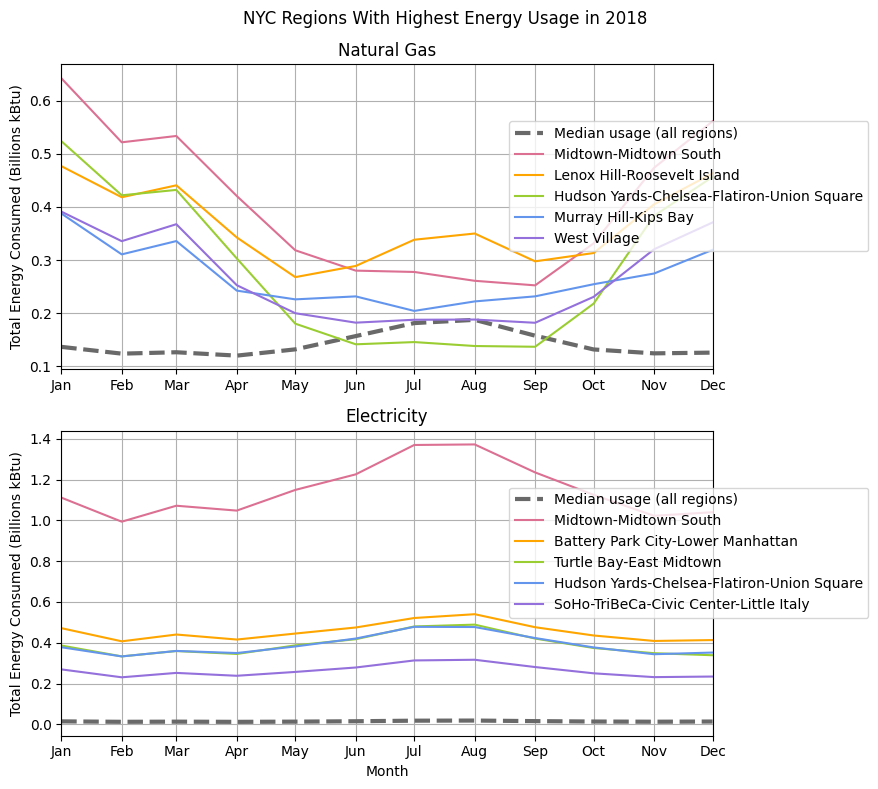

In [1011]:
x = df2_total_usage.index # list of datetimes

nta_fig2, nta_axs2 = plt.subplots(2, figsize=(9,8))
nta_fig2.suptitle('NYC Regions With Highest Energy Usage in 2018')

# plot means
# gas plot
nta_axs2[0].set_title("Natural Gas")
nta_axs2[0].plot(x, y_nta_gas_med_a, color='dimgrey', linestyle='--', linewidth=3, label='Median usage (all regions)')
nta_axs2[0].set_xticks(x)
nta_axs2[0].set_xlim(x.min(), x.max())
nta_axs2[0].set_xticklabels(labels)
nta_axs2[0].set_ylabel('Total Energy Consumed (Billions kBtu)', fontsize=10)
nta_axs2[0].grid()

# electricity plot
nta_axs2[1].set_title("Electricity")
nta_axs2[1].plot(x, y_nta_elec_med_a, color='dimgrey', linestyle='--', linewidth=3, label='Median usage (all regions)')
nta_axs2[1].set_xticks(x)
nta_axs2[1].set_xlim(x.min(), x.max())
nta_axs2[1].set_xticklabels(labels)
nta_axs2[1].set_ylabel('Total Energy Consumed (Billions kBtu)', fontsize=10)
nta_axs2[1].set_xlabel('Month', fontsize=10)
nta_axs2[1].grid()

for i, nta in enumerate(top5a_gas_nta_arr):
  temp = df5_join_usage_temp[df5_join_usage_temp['NTA'] == nta].groupby('Month')['Gas Usage'].agg('sum')
  y_nta_gas = temp.to_numpy()
  nta_axs2[0].plot(x, y_nta_gas, color=colors[i], label=nta)
  
for i, nta in enumerate(top5a_elec_nta_arr):
  temp = df5_join_usage_temp[df5_join_usage_temp['NTA'] == nta].groupby('Month')['Electricity Usage'].agg('sum')
  y_nta_elec = temp.to_numpy()
  nta_axs2[1].plot(x, y_nta_elec, color=colors[i], label=nta)
  
nta_axs2[0].legend(bbox_to_anchor = (1.25, 0.6), loc='center right')
nta_axs2[1].legend(bbox_to_anchor = (1.25, 0.6), loc='center right')
nta_fig2.tight_layout()   
nta_fig2.show()

-- Analysis by property type

In [1048]:
final_df = pd.read_csv('/Users/agnespark/fds/data/final_data_1.csv')

ref_df = final_df[['Property Id', 'Primary Property Type - Portfolio Manager-Calculated', 'Number of Buildings', 'Year Built', 'Occupancy', 'Total GFA (ft2)']]

In [1054]:
# df20g = ref_df[ref_df['Property Id'].isin(top10_gas_pids_arr)]
# df20e = ref_df[ref_df['Property Id'].isin(top10_elec_pids_arr)]
df20 = ref_df
df20t = ref_df[(ref_df['Property Id'].isin(top10_elec_pids_arr)) | (ref_df['Property Id'].isin(top10_gas_pids_arr))]
df20n = ref_df[~(ref_df['Property Id'].isin(top10_elec_pids_arr)) & ~(ref_df['Property Id'].isin(top10_gas_pids_arr))]

In [1034]:
df20g_desc = df20g.describe().drop(columns=['Property Id'])
df20g_desc

,Year Built,Occupancy,Total GFA (ft2)
count,2271.000000,2271.000000,2.271000e+03
mean,1960.581242,99.075297,3.624098e+05
std,30.143086,5.596889,5.029666e+05
min,1833.000000,0.000000,1.313000e+03
25%,1937.500000,100.000000,1.524150e+05
50%,1961.000000,100.000000,2.300000e+05
75%,1980.000000,100.000000,3.952960e+05
max,2018.000000,100.000000,1.047757e+07


In [1035]:
df20e_desc = df20e.describe().drop(columns=['Property Id'])
df20e_desc

,Year Built,Occupancy,Total GFA (ft2)
count,2271.000000,2271.000000,2.271000e+03
mean,1961.922941,97.582563,5.013096e+05
std,35.470988,8.557354,5.658653e+05
min,1833.000000,0.000000,1.217400e+04
25%,1929.000000,100.000000,2.069005e+05
50%,1966.000000,100.000000,3.500000e+05
75%,1991.000000,100.000000,5.727190e+05
max,2019.000000,100.000000,1.047757e+07


In [1044]:
# df20g_not = ref_df[~ref_df['Property Id'].isin(top10_gas_pids_arr)]
# df20e_not = ref_df[~ref_df['Property Id'].isin(top10_elec_pids_arr)]


In [1037]:
df20g_not_desc = df20g_not.describe().drop(columns=['Property Id'])
df20g_not_desc

,Year Built,Occupancy,Total GFA (ft2)
count,20433.000000,20433.000000,2.043300e+04
mean,1946.135173,98.384721,9.394276e+04
std,32.845519,8.404313,1.519784e+05
min,1800.000000,0.000000,2.000000e+02
25%,1924.000000,100.000000,3.850000e+04
50%,1931.000000,100.000000,5.924400e+04
75%,1965.000000,100.000000,9.632700e+04
max,2020.000000,100.000000,3.636683e+06


In [1038]:
df20e_not_desc = df20e_not.describe().drop(columns=['Property Id'])
df20e_not_desc

,Year Built,Occupancy,Total GFA (ft2)
count,20433.000000,20433.000000,2.043300e+04
mean,1945.986052,98.550629,7.850492e+04
std,32.178536,8.119790,7.039951e+04
min,1800.000000,0.000000,2.000000e+02
25%,1924.000000,100.000000,3.850000e+04
50%,1932.000000,100.000000,5.920000e+04
75%,1963.000000,100.000000,9.597400e+04
max,2020.000000,100.000000,4.000932e+06


In [ ]:
df20g_not = ref_df[~ref_df['Property Id'].isin(top10_gas_pids_arr)]

In [1055]:
df20_desc = df20.describe().drop(columns=['Property Id'])
df20t_desc = df20t.describe().drop(columns=['Property Id'])
df20n_desc = df20n.describe().drop(columns=['Property Id'])

In [ ]:
labels = ['Number of Buildings', 'Median Year Built', 'std', 'median']



number of buildings in dataset - 27936
number of unique building ids = 22704
median for year built is 1936 with range 1800-2020
188 geographic location categories

In [1203]:
len(ref_df['Property Id'].unique())

22704

In [1056]:
df20_desc

,Number of Buildings,Year Built,Occupancy,Total GFA (ft2)
count,22704.000000,22704.000000,22704.000000,2.270400e+04
mean,1.230444,1947.580162,98.453797,1.207966e+05
std,3.436631,32.871688,8.169583,2.292808e+05
min,0.000000,1800.000000,0.000000,2.000000e+02
25%,1.000000,1925.000000,100.000000,4.049475e+04
50%,1.000000,1936.000000,100.000000,6.452950e+04
75%,1.000000,1967.000000,100.000000,1.151625e+05
max,161.000000,2020.000000,100.000000,1.047757e+07


In [1057]:
df20t_desc

,Number of Buildings,Year Built,Occupancy,Total GFA (ft2)
count,3620.000000,3620.000000,3620.000000,3.620000e+03
mean,2.032873,1959.261326,98.233425,3.880554e+05
std,7.623880,32.122214,7.502929,4.797503e+05
min,0.000000,1833.000000,0.000000,1.313000e+03
25%,1.000000,1930.000000,100.000000,1.581552e+05
50%,1.000000,1961.500000,100.000000,2.533955e+05
75%,1.000000,1983.000000,100.000000,4.381925e+05
max,161.000000,2019.000000,100.000000,1.047757e+07


In [1063]:
num_buildings = df20['Number of Buildings'].sum()
num_sqft = df20['Total GFA (ft2)'].sum()
num_people = df20['Occupancy'].sum()

print(num_buildings, num_sqft, num_people)

27936 2742565171.9 2235295


In [1064]:
num_buildings_t = df20t['Number of Buildings'].sum()
num_sqft_t = df20t['Total GFA (ft2)'].sum()
num_people_t = df20t['Occupancy'].sum()

print(num_buildings_t, num_sqft_t, num_people_t)

7359 1404760654.6 355605


In [1065]:
num_sqft - num_sqft_t

1337804517.3000002

In [1069]:
property_type_breakdown = df20['Primary Property Type - Portfolio Manager-Calculated'].value_counts()
property_type_breakdown_t = df20t['Primary Property Type - Portfolio Manager-Calculated'].value_counts()

In [1152]:
ptypes = property_type_breakdown
ptypes_df = ptypes.to_frame()
ptypes_df.reset_index(inplace=True)
ptypes = ptypes_df.rename(columns={'Primary Property Type - Portfolio Manager-Calculated': 'ptype'})
ptypes

,ptype,count
0,Multifamily Housing,15953
1,Office,1964
2,K-12 School,1426
3,Hotel,407
4,Non-Refrigerated Warehouse,316
...,...,...
59,Convenience Store without Gas Station,2
60,Veterinary Office,2
61,Ice/Curling Rink,2
62,Zoo,1


In [1175]:
ptypes_t = property_type_breakdown_t
ptypes_t_df = ptypes_t.to_frame()
ptypes_t_df.reset_index(inplace=True)
ptypes_t = ptypes_t_df.rename(columns={'Primary Property Type - Portfolio Manager-Calculated': 'ptype'})
ptypes_t

,ptype,count
0,Multifamily Housing,1980
1,Office,768
2,Hotel,143
3,K-12 School,115
4,Senior Care Community,62
5,College/University,58
6,Hospital (General Medical & Surgical),54
7,Retail Store,45
8,Mixed Use Property,34
9,Other,31


In [1183]:
other = ptypes.iloc[5:, 1].sum()
other_t = ptypes_t.iloc[5:, 1].sum()

labels = ptypes['ptype'][:5].to_list()
labels.append('Other')

labels_t = ptypes_t['ptype'][:5].to_list()
labels_t.append('Other')

other_t

552

In [1184]:
count = ptypes['count'][:5].to_list()
count.append(other)

count_t = ptypes_t['count'][:5].to_list()
count_t.append(other_t)
count_t

[1980, 768, 143, 115, 62, 552]

In [1178]:
count

[15953, 1964, 1426, 407, 316, 2638]

<module 'matplotlib.pyplot' from '/Users/agnespark/eb-virt/lib/python3.11/site-packages/matplotlib/pyplot.py'>

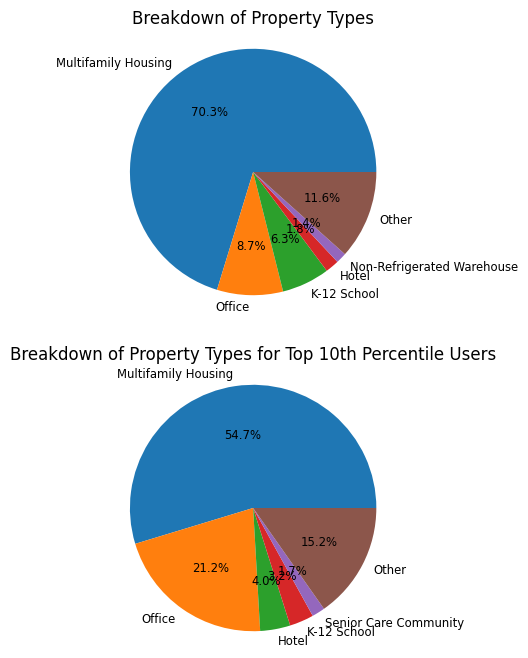

In [1200]:
# labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
# sizes = [15, 30, 45, 10]

fig_pt, axs_pt = plt.subplots(2, figsize=(9,8))
axs_pt[0].set_title("Breakdown of Property Types")
axs_pt[0].pie(count, labels=labels, autopct='%1.1f%%', textprops={'size': 'smaller'}, radius=1.1)
axs_pt[1].set_title("Breakdown of Property Types for Top 10th Percentile Users")
axs_pt[1].pie(count_t, labels=labels_t, autopct='%1.1f%%', textprops={'size': 'smaller'}, radius=1.1)
plt